# Sparks Foundation Internship - Task 1

## Predicting the percentage of a student based on the number of study hours 

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
path = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

### Reading the dataset

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Visualisation

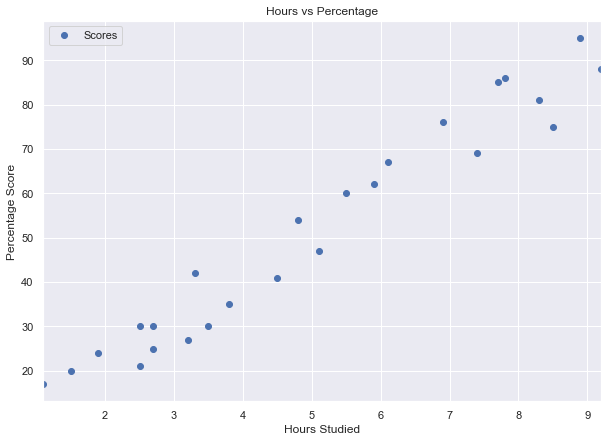

In [6]:
# Scatter plot of Hours vs Scores
df.plot(x='Hours', y='Scores', style='o')  
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Text(0, 0.5, 'Percentage Score')

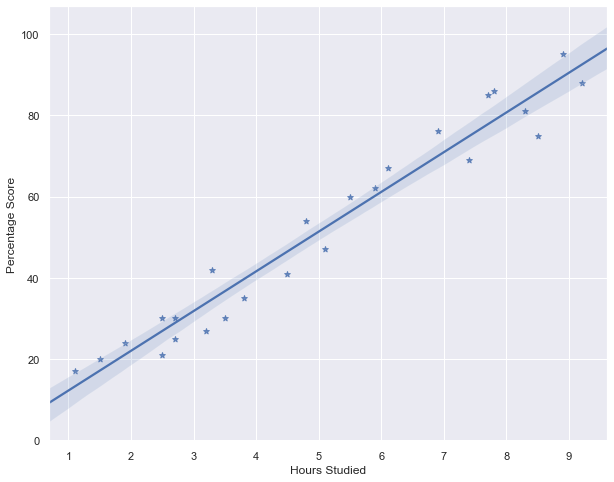

In [7]:
# Regression plot of Hours vs Scores
sns.regplot(x=df['Hours'], y=df['Scores'], marker="*")
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

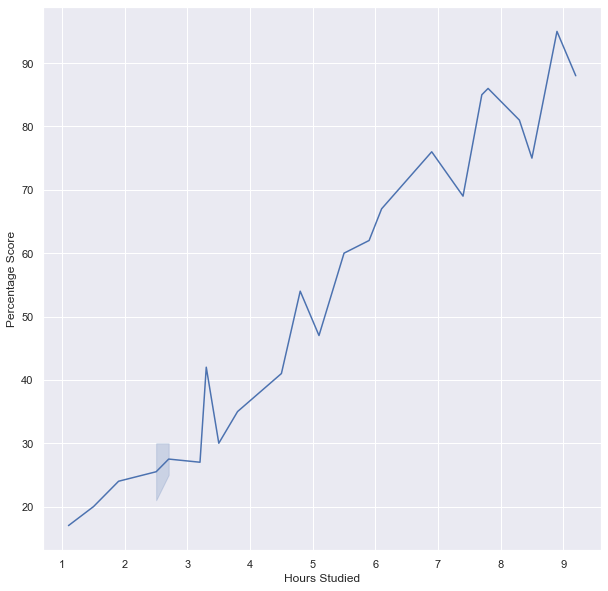

In [8]:
# Lineplot of Hours vs Scores
sns.lineplot(x='Hours', y='Scores',data=df)
sns.set(rc={'figure.figsize':(10,8)})
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

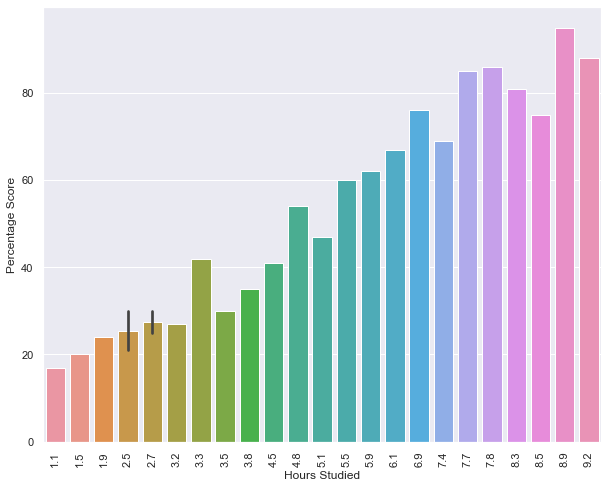

In [9]:
# Barplot of Hours vs Scores
sns.barplot(x=df['Hours'],y=df['Scores'])
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.xticks(rotation=90)

### Preparing the data 

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
x = df[['Hours']]
y= df['Scores']

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

### Training the algorithm

In [14]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the values 

In [21]:
y_pred = lm.predict(x_test)

In [22]:
# Comparing Actual vs Predicted
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_pred 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### Predicting the value for the given task  

In [23]:
yhat = lm.predict([[9.25]])   #predicting score for hours = 9.25
print ("Hours = 9.25")
print ("Score =", yhat)

Hours = 9.25
Score = [93.69173249]


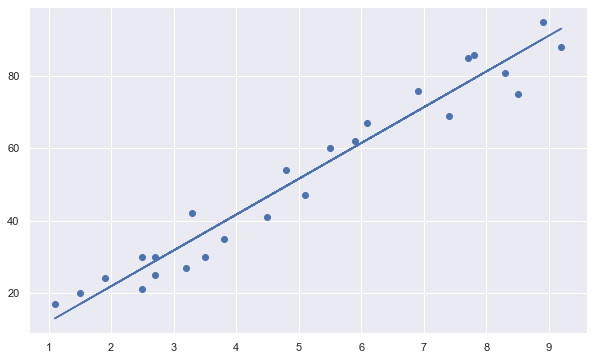

In [24]:
# Plotting the regression line
line = lm.coef_*x+lm.intercept_

# Plotting for the test data
sns.set(rc={'figure.figsize':(10,6)})
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Evaluating the model

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
